In [37]:
import pandas as pd
import numpy as np
import math

UNCLASSIFIED = False
NOISE = -1

In [38]:
def _dist(p,q):
    d1=(p[0]-q[0])**2
    d2=(p[1]-q[1])**2
    _dist=np.sqrt(d1+d2)
    return _dist
# bolbs=pd.read_csv('blobs.csv')
#print(_dist(bolbs.iloc[0],bolbs.iloc[1]))

In [39]:
def _eps_neighborhood(p,q,eps):
    pqdist=_dist(p,q)
    if pqdist <= eps:
        return True
    else:
        return False
# print(_eps_neighborhood(bolb.iloc[0],bolb.iloc[1],3))

In [40]:
def _region_query(m, point_id, eps):
    n_points = m.shape[1]
    seeds = []
    for i in range(n_points):
        if i != point_id:
            p=[m[0,i],m[1,i]]
            q=[m[0,point_id],m[1,point_id]]
            neighbor=_eps_neighborhood(p,q,eps)
            if neighbor==True:
                seeds.append(i)
    return seeds
# dataset_1 = pd.read_csv('blobs.csv')[:80].values
# m = np.asmatrix(dataset_1)
# m = m.transpose()
# print(_region_query(m,11,1.6))

In [41]:
def _expand_cluster(m, classifications, point_id, cluster_id, eps, min_points):
    # expand the cluster of cluster_id from point_id
    # identify all points belonging to cluster_id
    # update the clustering results in "classification" by assigning cluster_id to each point
    # return True if point_id is a core, False if point_id is not a core
    # write your code below
    seeds=_region_query(m,point_id,eps)
    if len(seeds)<min_points:
        classifications[point_id]= NOISE
        return False
    elif len(seeds)>=min_points:
        classifications[point_id]= cluster_id
        for l in seeds:
            classifications[l]=cluster_id
        while len(seeds)>0:
            new=seeds[0]
            new_seeds=_region_query(m,new,eps)
#             print(new_seeds)
            if len(new_seeds)>=min_points:
                for k in range(len(new_seeds)):
                    newnew=new_seeds[k]
                    if classifications[newnew]==UNCLASSIFIED or classifications[newnew]==NOISE:
                        if classifications[newnew]==UNCLASSIFIED:
                            seeds.append(newnew)
                        classifications[newnew]=cluster_id
            seeds=seeds[1:] 
#             print(seeds)
        return True
# dataset_1 = pd.read_csv('blobs.csv')[:80].values
# m = np.asmatrix(dataset_1)
# m = m.transpose()
# n_points = m.shape[1]
# classifications = [UNCLASSIFIED] * n_points
# print(_region_query(m,2,1.6))
# print(_expand_cluster(m,classifications,2,1,1.6,5))

In [42]:
def dbscan(m, eps, min_points):
    """Implementation of DBSCAN
    You can refer to wikipedia for detailed algorithm: https://en.wikipedia.org/wiki/DBSCAN
    Use Euclidean Distance as the measure
    
    Inputs:
    m - A matrix whose columns are feature vectors
    eps - Maximum distance two points can be to be regionally related
    min_points - The minimum number of points to make a cluster
    
    Outputs:
    An array with either a cluster id number or dbscan.NOISE (None) for each column vector in m
    """
    cluster_id = 1
    n_points = m.shape[1]
    classifications = [UNCLASSIFIED] * n_points
    # the main dbscan algorithm
    # put your code here
    for point_id in range(0,n_points):
         if classifications[point_id]==UNCLASSIFIED:
                if _expand_cluster(m,classifications,point_id, cluster_id, eps, min_points)==True:
                    cluster_id=cluster_id+1
    return classifications

In [43]:
# test here
dataset_1 = pd.read_csv('blobs.csv')[:80].values
m = np.asmatrix(dataset_1)
m = m.transpose()

In [44]:
eps = 1.6
min_points = 5
a = dbscan(m, eps, min_points)

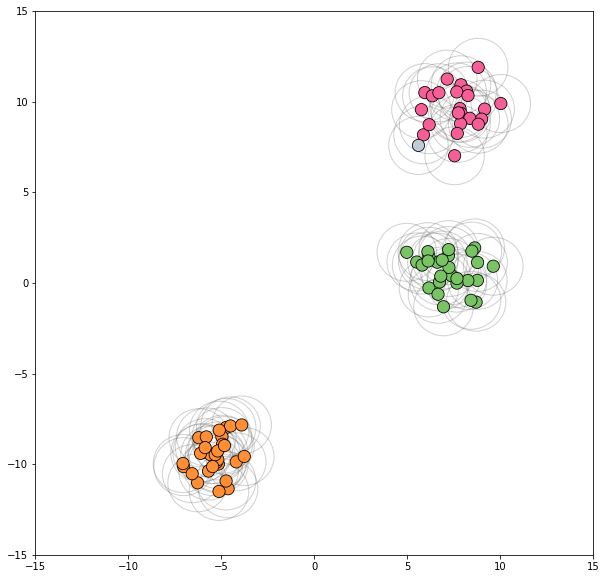

In [45]:
%matplotlib inline
import dbscan_lab_helper as helper

result = np.asarray(a)
helper.plot_clustered_dataset(dataset_1, result, neighborhood=True, epsilon=eps)

In [46]:
dataset_2 = pd.read_csv('varied.csv')[:300].values
m = np.asmatrix(dataset_2)
m = m.transpose()

In [47]:
eps = 1.3
min_points = 5
a = dbscan(m, eps, min_points)

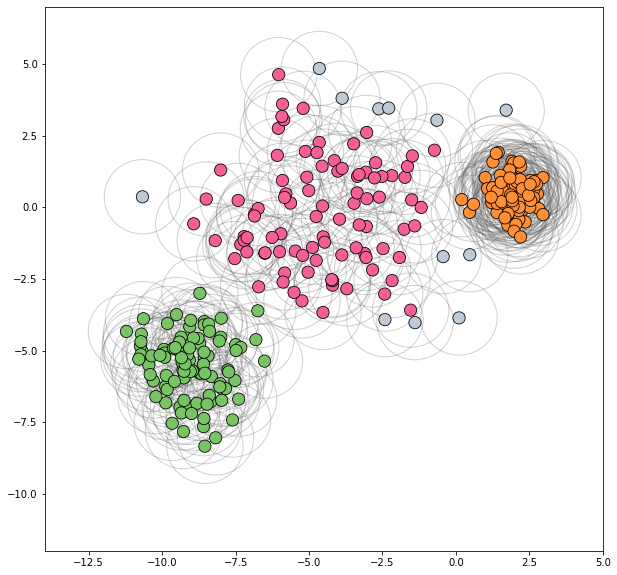

In [48]:
result = np.asarray(a)
helper.plot_clustered_dataset(dataset_2, result, xlim=(-14, 5), ylim=(-12, 7), neighborhood=True, epsilon=eps)
